# 🌍 **Land Type Classification Using EuroSAT Dataset**
---
**Team Members:**

*   Mahmoud Muhammad Mostafa **(Team Leader)**
*   Ahmed Wasim
*   Abdulhamid Ali Jalal
*   Nada Fahmy
*   Mayar Ehab Hessain
*   Eman Emad Kamal

# 📊 **Exploratory Data Analysis Report**

---

### **Dataset Information**

- **Source:** [EuroSAT dataset](https://www.kaggle.com/datasets/nilesh789/eurosat-rgb).
- **Size:** 27,000+ images.
- **Captured By:** Sentinel-2A satellite.
- **Classes:** 10 distinct land categories (e.g., Forest, River, Residential).
- **Resolution:** 64x64 pixels.

---

### **2. Class Distribution:**

**Key Observations:**
- The dataset exhibits a **relatively balanced distribution** across the classes, with slight variations:
  - **Dominant Classes:** The **"Forest"** and **"HerbaceousVegetation"** classes contain the largest number of images, making them the dominant land types.
  - **Moderately Represented Classes:** Classes such as **"Highway," "Industrial," "AnnualCrop,"** and **"Residential"** contribute moderately to the dataset, although they are less frequent than the dominant classes.
  - **Class Imbalance:** The **"Pasture"** class is notably **underrepresented**, leading to a slight imbalance in the dataset. This imbalance could potentially impact the model’s ability to generalize for the "Pasture" class, resulting in lower performance for this category.

**Class Representation Breakdown:**
- **"SeaLake"** accounts for **11.1%** of the images, which is in line with the proportions of other major classes such as **"Forest"** and **"HerbaceousVegetation."**
- All classes are represented in the **9% to 11%** range, ensuring that no class is overwhelmingly dominant.

---

### **3. RGB Channel Analysis:**

**Key Observations:**
- The **mean RGB values** for the dataset are:
  - **R (Red):** 87.8
  - **G (Green):** 97.0
  - **B (Blue):** 104.0
  
- The **standard deviation** for the RGB channels is:
  - **R (Red):** 23.3
  - **G (Green):** 16.6
  - **B (Blue):** 14.1
  
These values suggest that the images have varied pixel intensities across all channels, with the **Green channel** being slightly more stable than the others. The relatively **high standard deviation** in the red channel indicates some variation in the lighting or color scheme of the images.

**RGB Channel Visualization:**
The histogram of each channel (Red, Green, and Blue) shows the distribution of pixel intensities. Here's the visualization of the RGB histograms:

- **Red Channel:** The histogram for the Red channel often has a wider distribution, indicating more variation in the red pixels.
- **Green Channel:** The Green channel tends to be more concentrated around certain pixel values, which shows less variation compared to the Red and Blue channels.
- **Blue Channel:** The Blue channel also has a wider distribution but slightly more concentrated around specific pixel values than the Red channel.

By visualizing these histograms, you can observe the overall color distribution in the dataset, which might be helpful for preprocessing or enhancing model performance in certain color-dependent features.

---

### **4. Actionable Insights for Class Imbalance:**

**Class Imbalance Handling:**
Given that the "Pasture" class is underrepresented, the following strategies should be implemented to mitigate the imbalance and improve model performance:
  
1. **Resampling:**
   - **Upsample** the "Pasture" class by adding more instances through replication or augmentation.
   - **Downsample** the dominant classes like "Forest" and "HerbaceousVegetation" to ensure that the model doesn’t become biased toward these overrepresented categories.
  
2. **Data Augmentation:**
   - Apply techniques like **rotation**, **flipping**, and **cropping** to increase the diversity of the "Pasture" class, which will help the model learn more robust features for this class.

3. **Weighted Loss Function:**
   - Use a **weighted loss function** during training to give more importance to the "Pasture" class, so that misclassifying it incurs a higher penalty, making the model focus more on learning this underrepresented class.

4. **Future Data Collection:**
   - **Expand the "Pasture" class** with additional data samples to improve its representation. This will help the model better understand this class and perform better in the real-world deployment of the model.

---

### **5. Visual Insights:**

- **Class Distribution Visualization:**
  - A **bar plot** can be used to visualize the number of images in each class, showing that **"Forest"** and **"HerbaceousVegetation"** are dominant, while **"Pasture"** is underrepresented.
  - A **pie chart** can also be helpful to understand the class proportions, with **"SeaLake"** being consistent with the other major classes, ensuring balance in the dataset.
  
- **RGB Channel Visualization:**
  - A **histogram** of RGB values for each channel (R, G, and B) will allow further inspection of the color distribution in the dataset. The high variance in the red channel can be visually confirmed, providing insights into the color characteristics of the images.

---

### **6. Preprocessing with FastAI Datablock API:**

We will preprocess the dataset using the **FastAI Datablock API**, which provides a structured pipeline for data processing, transformation, and loading.

- **Datablock Setup:**
    - The **`DataBlock`** API will be used to define the dataset, apply transformations, and split it into training and validation sets.
    - The images will be resized to **224x224** to match the input size required for most deep learning models like VGG16 or ResNet.
    - **Data Augmentation** will be applied to the training data to increase diversity and improve generalization. Techniques like **rotation, flipping, cropping**, and **warping** will be used.
    - **Random Splitting** will be employed to divide the data into training and validation sets (80% training, 20% validation).

Here is how the data is preprocessed:

```python
from fastai.vision.all import *
from torchvision.models import vgg16
import os

# Define the dataset path and labels
dataset_path = "/content/eurosat-rgb/2750"
LABELS = [
    "SeaLake", "Highway", "River", "Pasture", "Industrial",
    "Residential", "PermanentCrop", "AnnualCrop", "Forest", "HerbaceousVegetation"
]

# Create a DataBlock for preprocessing
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, max_warp=0)  # max_warp=0 disables warping (i.e., no random distortions or perspective changes)
)

# Load DataLoaders
dls = dblock.dataloaders(dataset_path, bs=64)
dls.show_batch(max_n=16, figsize=(12, 8))
```

The preprocessing steps will ensure that the images are ready for training using a deep learning model, with appropriate data augmentation techniques applied to improve model performance and generalization.

---

### **7. Conclusion:**

- **Class Balance:** The dataset has a **fairly balanced distribution** across the land categories, with the exception of the **"Pasture"** class, which requires further attention due to its underrepresentation.
- **Model Bias Potential:** The dominance of classes like **"Forest"** and **"HerbaceousVegetation"** may lead to model bias unless specific techniques such as resampling or a weighted loss function are applied.
- **Feature Diversity:** The images exhibit varying RGB values, which may indicate diverse environmental conditions or satellite imaging variations.
- **Preprocessing Strategy:** The dataset will be preprocessed using **FastAI's Datablock API**, ensuring efficient data handling and augmentation for model training.

By addressing the **Pasture class imbalance** and incorporating the suggested handling strategies, the model can be trained to perform robustly across all classes.

# **Loading Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Loading**

In [ ]:
!pip install -q opendatasets

import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/nilesh789/eurosat-rgb")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: mahmoudalrefaey
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nilesh789/eurosat-rgb


100%|██████████| 89.6M/89.6M [00:00<00:00, 158MB/s]


# **Data Exploration and EDA**

In [ ]:
# Path to the Data folder
dataset_path = "/content/eurosat-rgb/2750"

# List and print all folders inside 2750
folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Folders:", folders)

Folders: ['Highway', 'Industrial', 'AnnualCrop', 'Residential', 'River', 'HerbaceousVegetation', 'Forest', 'SeaLake', 'Pasture', 'PermanentCrop']


We have various type of images in our dataset (Types of images shown above)

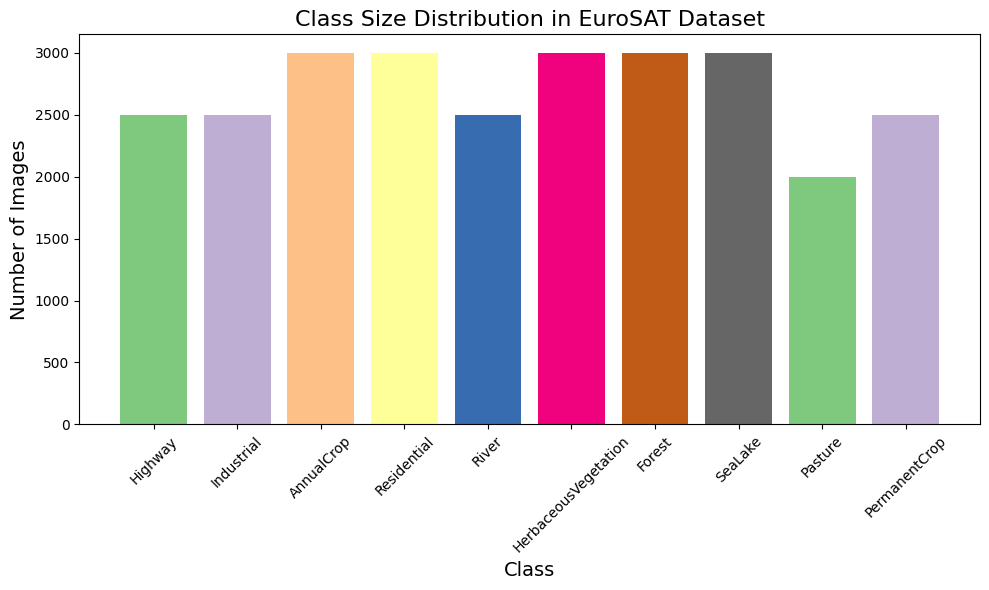

In [ ]:
class_counts = {}
for folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, folder)
    if os.path.isdir(class_path):
        class_counts[folder] = len(os.listdir(class_path))

# Create a color palette from seaborn
palette = sns.color_palette("Accent", len(class_counts))

# Plot the class size distribution with the color palette
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=palette)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Class Size Distribution in EuroSAT Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Observations:
- **Dominant Classes:** The **"Forest"** and **"HerbaceousVegetation"** classes contain the largest number of images, indicating that these land types are overrepresented in the dataset. This overrepresentation makes them dominant and may influence the model’s performance, as it could be biased toward these classes.
  
- **Moderately Represented Classes:** Other land types like **"Highway," "Industrial," "AnnualCrop,"** and **"Residential"** show moderate representation. While they contribute a fair share to the dataset, their frequency is still much lower compared to "Forest" and "HerbaceousVegetation." This moderate representation suggests that the model will be exposed to these categories but might struggle with distinguishing them from the dominant classes.

- **Class Imbalance:** The dataset shows **relatively balanced distribution** with slight variations between classes. However, the **"Pasture"** class stands out as significantly **underrepresented** in comparison to the other categories, making it the only class that introduces a noticeable imbalance. This imbalance might lead to poor model performance on this class, as it will not receive enough training data to learn its features effectively.

### Actionable Insights:
- **Handling Class Imbalance:** The **imbalance in the "Pasture" class** could potentially skew the model's predictions. You might consider implementing **techniques** to address this imbalance:
    - **Resampling:** Upsample the "Pasture" class or downsample the dominant classes to ensure the model gets a more balanced view of the dataset.
    - **Data Augmentation:** Increase the variety of images in the "Pasture" class using augmentation techniques (e.g., rotation, flipping, cropping) to artificially boost its representation.
    - **Weighted Loss Function:** Adjust the loss function during model training to penalize the misclassification of underrepresented classes like "Pasture." This can help the model give more attention to these rare classes.
  
- **Future Data Collection:** Consider gathering more data for the underrepresented **"Pasture"** class to ensure the model receives sufficient training on this category, improving its ability to generalize across all land types.

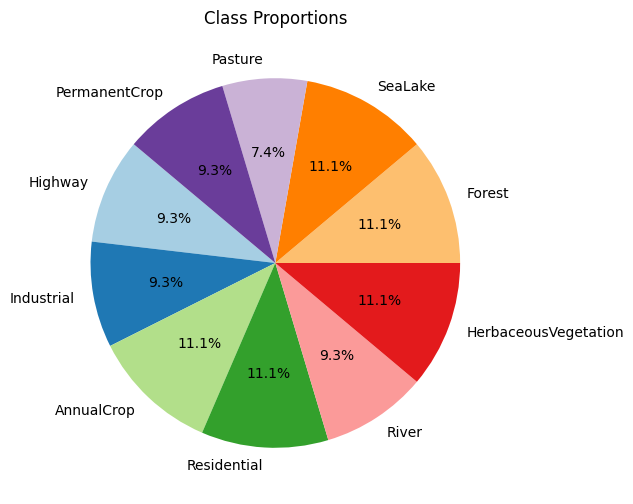

In [ ]:
# Plot class proportions
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Class Proportions')
plt.show()

### Key Observations:
- **"SeaLake" Class Representation:** The **"SeaLake"** class accounts for **11.1%** of the total images, which is consistent with other major classes like **"Forest"** and **"HerbaceousVegetation."** This highlights the **balance** of class representation within the dataset.

- **Balanced Distribution Across Classes:** The proportions of images across all classes range between **9% and 11%**, indicating that **no class is overwhelmingly dominant**. The data distribution is generally **even**, with only slight variation, which is crucial for training a model that doesn’t favor one class over another.

- **Class Imbalance:** However, there is **a slight imbalance** in the **"Pasture"** class, which is underrepresented compared to the rest of the categories. This imbalance, while relatively minor in comparison to the overall balanced distribution, could still affect model performance, particularly in accurately predicting this class.

### Actionable Insights:
- **Class Imbalance Management:** Given the **mild imbalance in the "Pasture" class**, it’s advisable to **address** this issue while keeping the balanced nature of the other classes in mind. Consider the following:
    - **Resampling:** Either **upsample** the "Pasture" class or **downsample** the dominant classes to make sure the model doesn’t underperform on this underrepresented category.
    - **Data Augmentation:** **Augment the "Pasture" class** using transformations like rotation, flipping, or cropping to artificially increase its presence in the dataset and provide more variety for the model to learn from.
    - **Weighted Loss Function:** Apply a **weighted loss function** that gives more importance to the "Pasture" class during training, ensuring it gets enough attention despite its lower representation.

- **Stable Distribution Across Other Classes:** The other classes are well-represented, with each class making up about **9% to 11%** of the dataset. This even distribution means that **standard training techniques** can be applied without any significant adjustments for class imbalance. The model can learn from each class fairly, and the risk of bias toward more frequent classes is minimized.

- **Future Monitoring:** Even though the distribution is well-balanced, it's still **essential to monitor model performance** during training, especially for the "Pasture" class. This ensures that the model doesn't struggle with underrepresented categories, maintaining consistent prediction accuracy across all classes.

In summary, while the dataset is **overall well-balanced**, addressing the **slight imbalance in the "Pasture" class** will help ensure that the model performs optimally across all land types. Standard training can be applied for the majority of the dataset, with targeted adjustments made for the minority class.

In [ ]:
# Check the dimensions of the images in the dataset.
from PIL import Image
import os

def check_image_size(image_path):
    """Check the dimensions of an image."""
    with Image.open(image_path) as img:
        return img.size  # Returns the dimensions (width, height)

def check_image_dimensions(dataset_path):
    """Check if all images in the dataset have the same dimensions."""
    all_dimensions = set()  # Set to store unique dimensions

    for folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, folder)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                width, height = check_image_size(image_path)
                all_dimensions.add((width, height))

    # Check if all dimensions are the same
    if len(all_dimensions) == 1:
        dim = all_dimensions.pop()  # Get the only dimension in the set
        print(f"All images have the same dimensions: {dim[0]}x{dim[1]}")
    else:
        print("Images have different dimensions.")

check_image_dimensions(dataset_path)


All images have the same dimensions: 64x64


**Key Observations:**

* Images have the same dimensions.
* All images have dimensions 64x64

In [ ]:
# Check for Duplicates
import hashlib

def get_image_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

seen_hashes = set()
duplicates = []
for folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, folder)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            img_hash = get_image_hash(image_path)
            if img_hash in seen_hashes:
                duplicates.append(image_path)
            else:
                seen_hashes.add(img_hash)

print(f"Found {len(duplicates)} duplicate images.")

Found 0 duplicate images.


**Perfect!** there's no duplicates through the data.

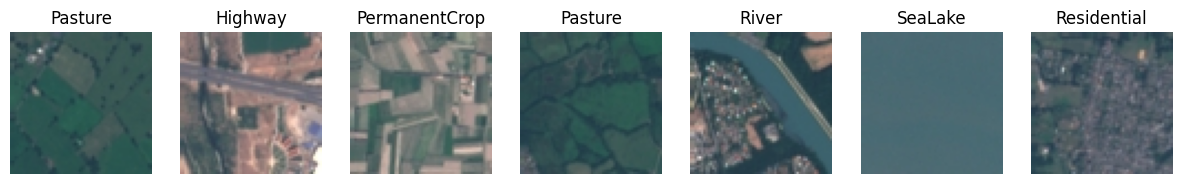

In [ ]:
# Visualize Samples of Images

import random
from PIL import Image

def plot_random_samples(dataset_path, num_samples=7):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        class_folder = random.choice(os.listdir(dataset_path))
        class_path = os.path.join(dataset_path, class_folder)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_folder)
    plt.show()

plot_random_samples(dataset_path)

# **RGB Channel Analysis**

In [ ]:
import cv2

# Calculate mean and std for RGB channels
rgb_means = []
rgb_stds = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rgb_means.append(np.mean(img, axis=(0, 1)))
        rgb_stds.append(np.std(img, axis=(0, 1)))

mean_rgb = np.mean(rgb_means, axis=0)
std_rgb = np.mean(rgb_stds, axis=0)

print(f"Mean RGB values: {mean_rgb}")
print(f"Standard Deviation of RGB values: {std_rgb}")

Mean RGB values: [ 87.81586936  96.97416421 103.98142337]
Standard Deviation of RGB values: [23.29876866 16.60519654 14.08630406]


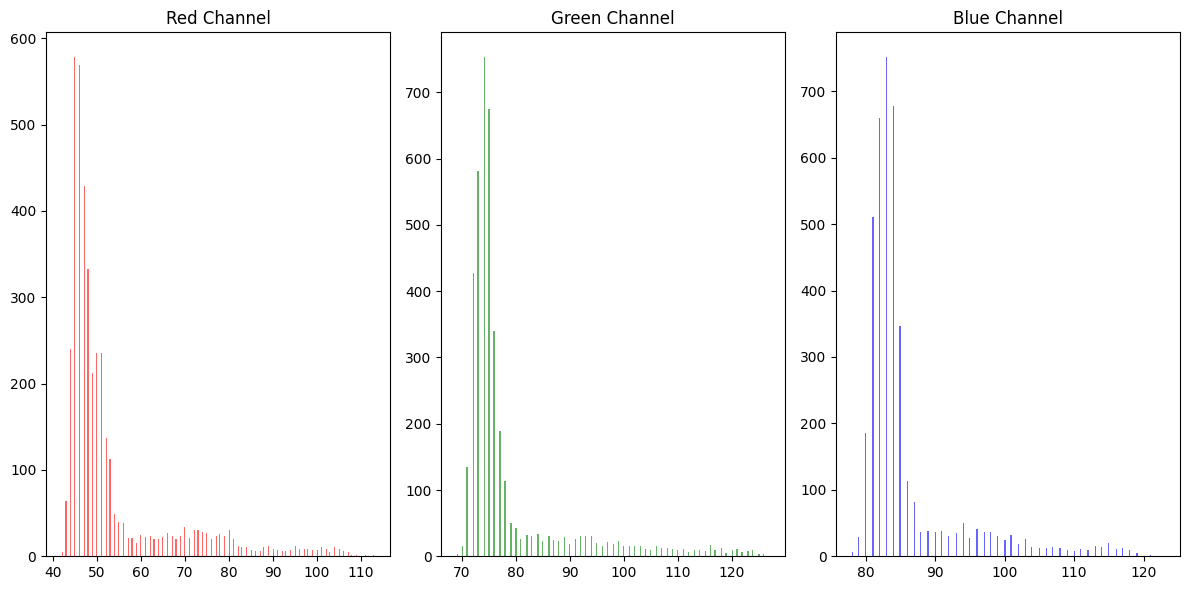

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the RGB channel histograms
def plot_rgb_histograms(image_path):
    # Open the image
    img = Image.open(image_path).convert('RGB')

    # Convert image to numpy array
    img_array = np.array(img)

    # Split the image into its RGB channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

    # Plot histograms for each channel
    plt.figure(figsize=(12, 6))

    # Red channel histogram
    plt.subplot(131)
    plt.hist(r.flatten(), bins=256, color='red', alpha=0.6)
    plt.title('Red Channel')

    # Green channel histogram
    plt.subplot(132)
    plt.hist(g.flatten(), bins=256, color='green', alpha=0.6)
    plt.title('Green Channel')

    # Blue channel histogram
    plt.subplot(133)
    plt.hist(b.flatten(), bins=256, color='blue', alpha=0.6)
    plt.title('Blue Channel')

    plt.tight_layout()
    plt.show()

sample_class_folder = random.choice(os.listdir(dataset_path))
sample_class_path = os.path.join(dataset_path, sample_class_folder)
sample_image_name = random.choice(os.listdir(sample_class_path))
sample_image_path = os.path.join(sample_class_path, sample_image_name)
plot_rgb_histograms(sample_image_path)

# **Preprocessing Dataset**
We will use FastAI Datablock API to preprocess the dataset



In [ ]:
!pip install -q fastai
!pip install -q torch

In [ ]:
from fastai.vision.all import *
from torchvision.models import vgg16, vgg19, resnet50
from torch import nn

DATASET = "/content/eurosat-rgb/2750"
LABELS = [
    "SeaLake", "Highway", "River", "Pasture", "Industrial",
    "Residential", "PermanentCrop", "AnnualCrop", "Forest", "HerbaceousVegetation"
]

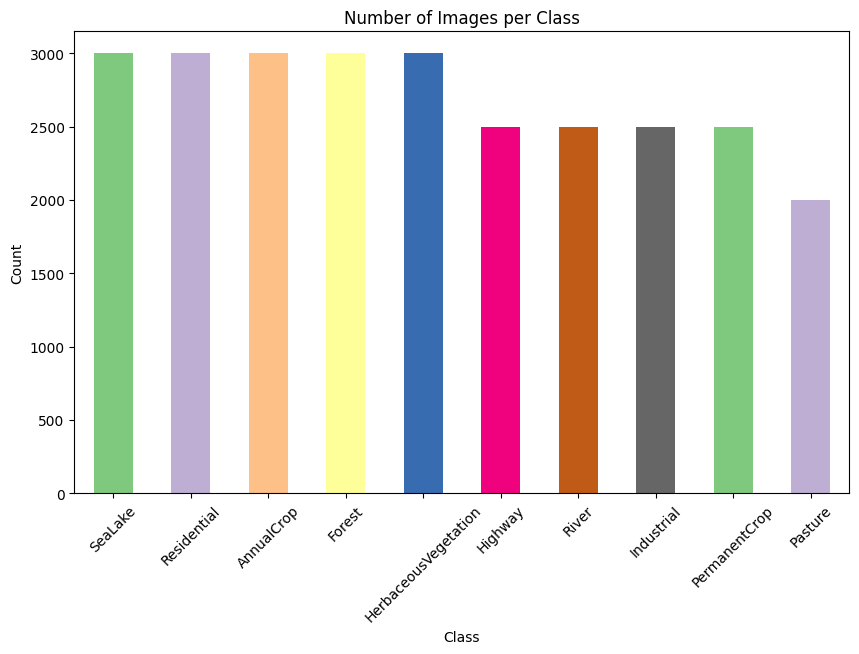

In [ ]:
# Collect image paths and their corresponding labels
img_paths = []
img_labels = []

for label in LABELS:
    label_dir = os.path.join(DATASET, label)
    if os.path.exists(label_dir):
        images = [os.path.join(label_dir, img) for img in os.listdir(label_dir)]
        img_paths.extend(images)
        img_labels.extend([label] * len(images))

# Create a DataFrame for analysis
data = pd.DataFrame({"Image": img_paths, "Label": img_labels})

# Visualize the number of images per class
plt.figure(figsize=(10, 6))
data['Label'].value_counts().plot(kind='bar', color=palette)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

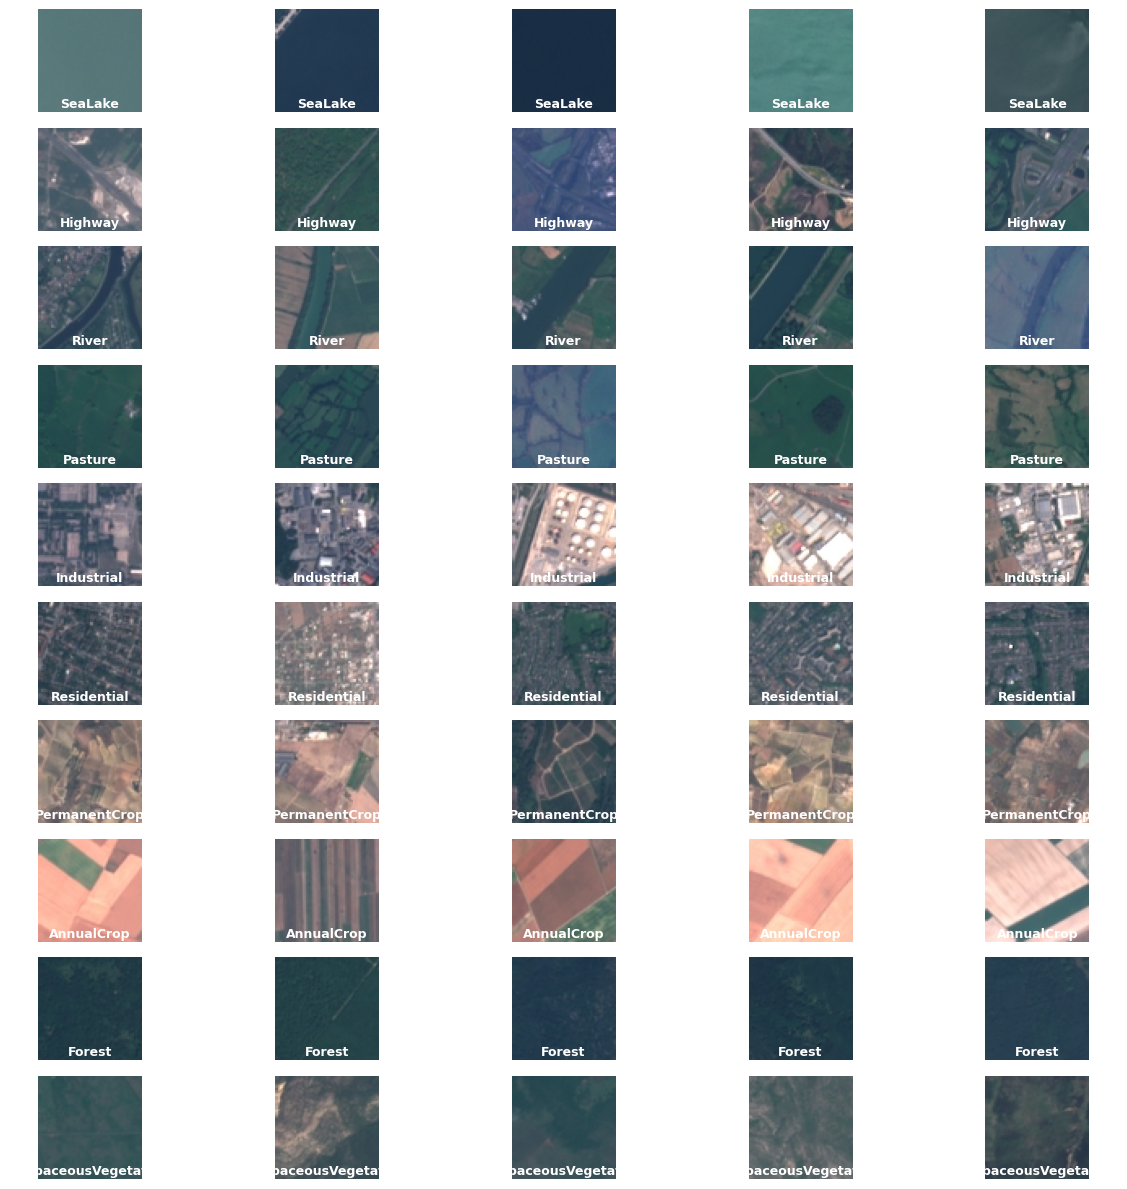

In [ ]:
def plot_sample_images(df, num_samples=5):
    """
    Plots a few sample images for each class with labels.
    """
    plt.figure(figsize=(12, 12))
    for idx, label in enumerate(LABELS):
        samples = df[df["Label"] == label].sample(num_samples, random_state=42)
        for j, img_path in enumerate(samples['Image'].values):
            plt.subplot(len(LABELS), num_samples, idx * num_samples + j + 1)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(label, fontsize=12)

            plt.text(0.5, 0.05, label, color='white', fontsize=9, ha='center',fontweight='bold', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

plot_sample_images(data, num_samples=5)

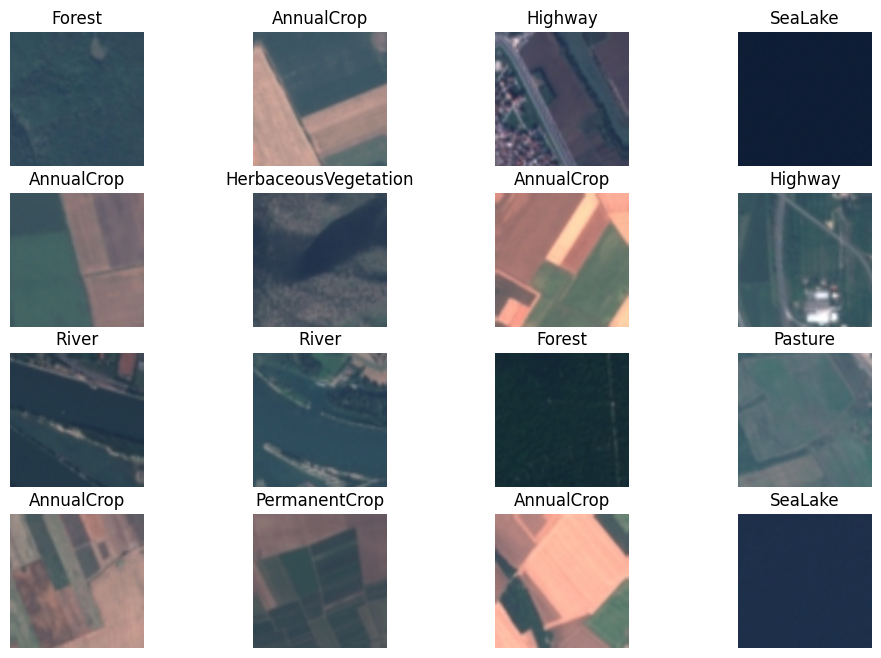

In [ ]:
# Define a DataBlock for preprocessing
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, max_warp=0) #max_warp=0 disables warping (i.e., no random distortions or perspective changes)
)

# Load DataLoaders
dls = dblock.dataloaders(DATASET, bs=64)
dls.show_batch(max_n=16, figsize=(12, 8))

# Now preprocessed data usable via dls

Now preprocessed data usable for our model via `dls`

# **Thanks!**